In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

## 데이터 분리
```
-> 훈련/(검증)/테스트
```

### 훈련/테스트용 분리

In [2]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, 
                                                    stratify=labels,
                                                    random_state=13)

In [11]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

### 훈련 / 테스트용이 잘 분리되었을까? 

In [12]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

### train 데이터만으로 결정나무 모델 만들기

In [13]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

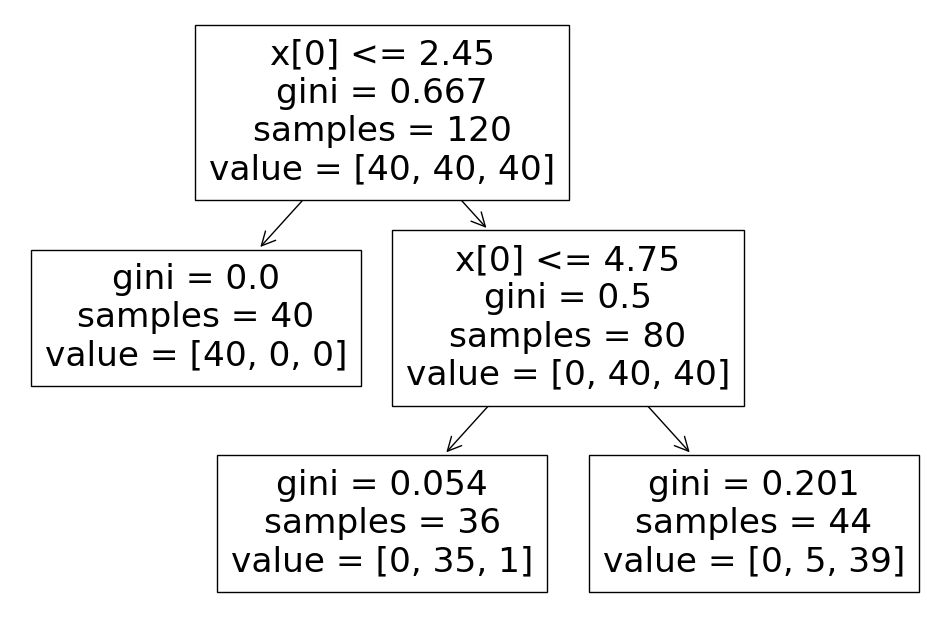

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(iris_tree);

### train 데이터에 대한 accuracy 확인

In [18]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tr)

0.9533333333333334

### 훈련데이터의 결정경계 정하기
```
-> 과적합 막기 위해 
```

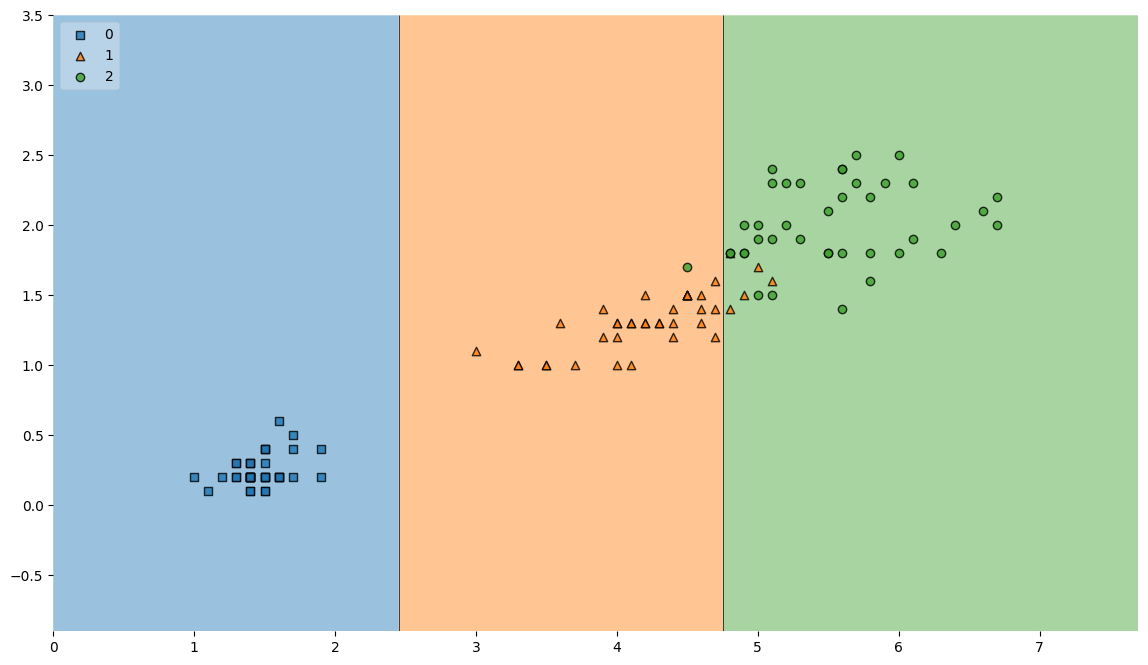

In [21]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14, 8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show();

### 테스트 데이터에 대한 accuracy

In [22]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

#### 그래프로 한 눈에 보기

<Axes: >

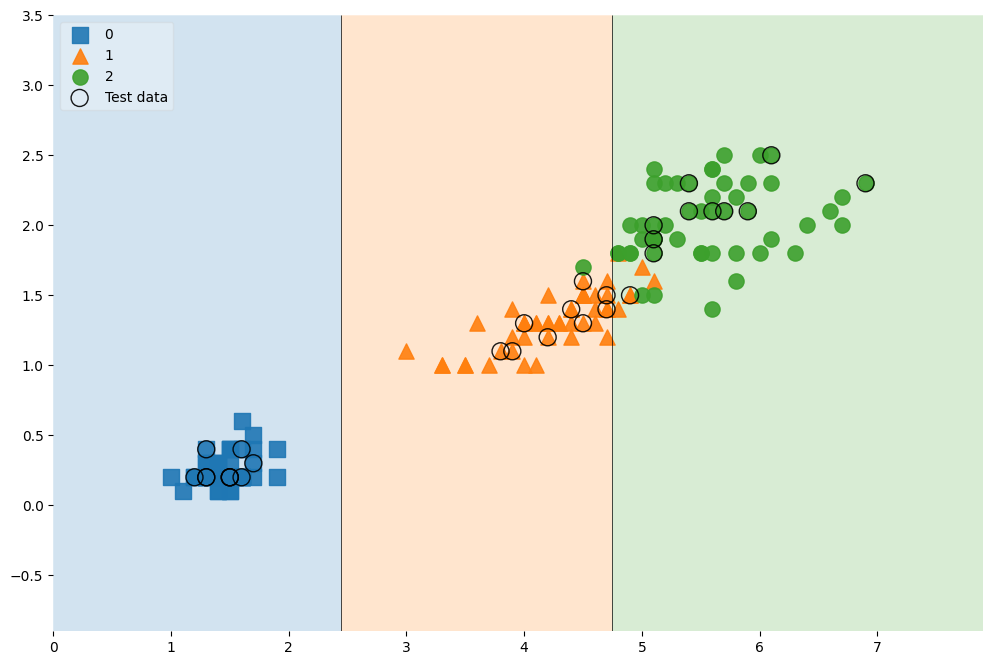

In [25]:
scatter_highlight_kwargs = {'s':150, 'label':'Test data', 'alpha':0.9}
scatter_kwargs = {'s':120, 'edgecolor':None, 'alpha':0.9} 

plt.figure(figsize=(12, 8))
plot_decision_regions(X=features, y=labels,
                      X_highlight=X_test, clf=iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha':0.2}
                      )


#### feature 4개 일 때, 

In [26]:
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, 
                                                    stratify=labels,
                                                    random_state=13)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=13)

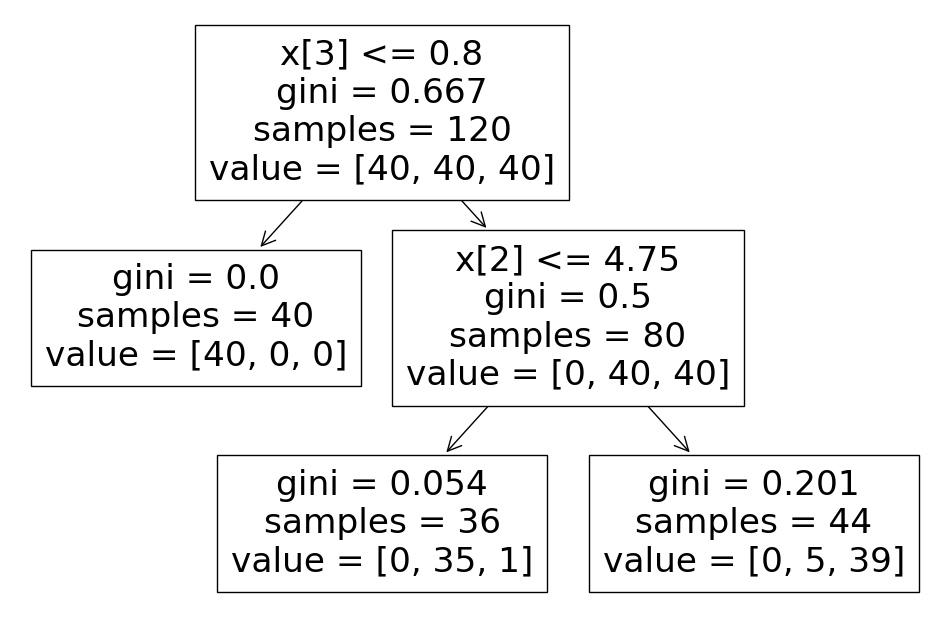

In [28]:
plt.figure(figsize=(12, 8))
plot_tree(iris_tree);

In [30]:
test_data = np.array([[4.3, 2, 1.2, 1]])
iris_tree.predict(test_data)

array([1])

In [32]:
test_data.shape

(1, 4)

In [34]:
np.array([4.3, 2, 1.2, 1]).shape

(4,)

#### 분류될 확률이 얼마나 되나?


In [35]:
iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [38]:
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

### 주요 특성 확인하기

In [43]:
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [44]:
dict(zip(iris.feature_names, iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.42189781021897804,
 'petal width (cm)': 0.578102189781022}

#### zip과 언패킹

In [45]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

In [48]:
zip(list1, list2)

In [49]:
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [50]:
dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [51]:
dict(zip(list1, list2))

{'a': 1, 'b': 2, 'c': 3}

In [52]:
# 언패킹
x, y = zip(*pairs)

In [53]:
x

('a', 'b', 'c')

In [54]:
y

(1, 2, 3)

In [55]:
list(x)

['a', 'b', 'c']

In [56]:
list(y)

[1, 2, 3]